In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


7


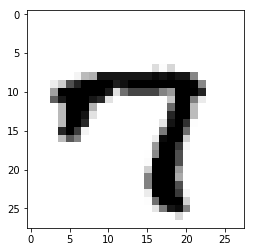

In [2]:
import matplotlib.pyplot as plt
image_index = 6666 # Select anything up to 60,000 to check how one image looks like
print(y_train[image_index]) # The label
plt.imshow(x_train[image_index], cmap='Greys')

In [11]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28, 1)
(60000,)


In [12]:
x_rows = x_train.shape[1]
x_cols = x_train.shape[2]
print(x_rows, x_cols)

28 28


In [3]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], x_rows, x_cols, 1)
x_test = x_test.reshape(x_test.shape[0],  x_rows, x_cols, 1)
input_shape = (x_rows, x_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train:', x_train.shape[0])
print('Number of images in x_test:', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train: 60000
Number of images in x_test: 10000


In [4]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Using TensorFlow backend.


In [5]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/10
60000/60000 [==============================] - 40s 664us/step - loss: 0.2064 - acc: 0.9387
Epoch 2/10
60000/60000 [==============================] - 39s 642us/step - loss: 0.0871 - acc: 0.9730
Epoch 3/10
60000/60000 [==============================] - 38s 638us/step - loss: 0.0599 - acc: 0.9816
Epoch 4/10
60000/60000 [==============================] - 37s 624us/step - loss: 0.0439 - acc: 0.9858
Epoch 5/10
60000/60000 [==============================] - 38s 627us/step - loss: 0.0371 - acc: 0.9881
Epoch 6/10
60000/60000 [==============================] - 37s 621us/step - loss: 0.0316 - acc: 0.9894
Epoch 7/10
60000/60000 [==============================] - 38s 627us/step - loss: 0.0269 - acc: 0.9910
Epoch 8/10
60000/60000 [==============================] - 39s 647us/step - loss: 0.0222 - acc: 0.9929
Epoch 9/10
60000/60000 [==============================] - 38s 627us/step - loss: 0.0213 

In [6]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 174us/step


[0.06083057565454692, 0.9867]

6


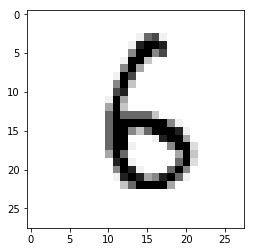

In [8]:
image_index = 3000
plt.imshow(x_test[image_index].reshape(x_rows, x_cols),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1,x_rows, x_cols, 1))
print(pred.argmax())